In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import files
data = files.upload()

Saving Spotify_Youtube.csv to Spotify_Youtube.csv


In [ ]:
data = pd.read_csv("Spotify_Youtube.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [ ]:
data.nunique()

Unnamed: 0          20718
Artist               2079
Url_spotify          2079
Track               17840
Album               11932
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [ ]:
#Creating a copy to store cleaned data in a new variable
data.head()
cleaned_data = data.copy(deep=True)

In [ ]:
#Data Cleaning

# First column is just row index which is unnamed and not necessary. Therefore, it is removed.
cleaned_data.drop(columns=cleaned_data.columns[0], axis=1, inplace=True)
cleaned_data.columns
cleaned_data.head() 

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Siddhartha,https://open.spotify.com/artist/2aqFBHOpM9uIgB...,0:00,0:00,album,spotify:track:7l4cSfrED7RrtT0t5CSOzv,0.494,0.729,10.0,-5.098,...,https://www.youtube.com/watch?v=eJwXivMnxcY,Siddhartha - 00:00 (Video Oficial),iamSiddharthaVEVO,20982512.0,217904.0,7600.0,Encuentra 00:00 de Siddhartha en tu plataforma...,True,True,54468664.0
1,Arizona Zervas,https://open.spotify.com/artist/0vRvGUQVUjytro...,2:00 AM,2:00 AM,single,spotify:track:1Agl3YCXpBcPspuXobCB2d,0.673,0.487,1.0,-7.011,...,https://www.youtube.com/watch?v=IH0gvNvMYIY,2 AM - Arizona Zervas (Official Audio),Arizona Zervas,113083.0,3838.0,241.0,"Official Audio for ""2 AM"" by Arizona Zervas.\n...",True,True,5088130.0
2,KAYTRANADA,https://open.spotify.com/artist/6qgnBH6iDM91ip...,10%,BUBBA,album,spotify:track:41SwdQIX8Hy2u6fuEDgvWr,0.794,0.757,6.0,-6.644,...,https://www.youtube.com/watch?v=02KzxLGcNJg,KAYTRANADA - 10% (Official Video) ft. Kali Uchis,KaytranadaVEVO,11650171.0,159858.0,2505.0,KAYTRANADA - 'BUBBA' out now!: https://smartur...,True,True,93637411.0
3,Brytiago,https://open.spotify.com/artist/00XhexlJEXQstH...,3:00 AM,Sauce Boyz,album,spotify:track:1F205Nl2feOSYSztLNOJAL,0.852,0.613,9.0,-5.261,...,https://www.youtube.com/watch?v=igiZ-IwMqc8,"Eladio Carrión, Brytiago - 3 AM (Video Oficial)",Eladio Carrion,11080437.0,161737.0,1329.0,"Eladio Carrión, Brytiago - 3 AM (Video Oficial...",True,True,126957216.0
4,Eladio Carrion,https://open.spotify.com/artist/5XJDexmWFLWOkj...,3:00 AM,Sauce Boyz,album,spotify:track:1F205Nl2feOSYSztLNOJAL,0.852,0.613,9.0,-5.261,...,https://www.youtube.com/watch?v=igiZ-IwMqc8,"Eladio Carrión, Brytiago - 3 AM (Video Oficial)",Eladio Carrion,11080437.0,161737.0,1329.0,"Eladio Carrión, Brytiago - 3 AM (Video Oficial...",True,True,126957216.0


In [ ]:
# URL Spotify is not required for the analysis. Hence, its removed. 
cleaned_data.drop(columns=cleaned_data.columns[1], axis=1, inplace=True)
cleaned_data.columns
cleaned_data.head() 

,Artist,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Siddhartha,0:00,0:00,album,spotify:track:7l4cSfrED7RrtT0t5CSOzv,0.494,0.729,10.0,-5.098,0.0482,...,https://www.youtube.com/watch?v=eJwXivMnxcY,Siddhartha - 00:00 (Video Oficial),iamSiddharthaVEVO,20982512.0,217904.0,7600.0,Encuentra 00:00 de Siddhartha en tu plataforma...,True,True,54468664.0
1,Arizona Zervas,2:00 AM,2:00 AM,single,spotify:track:1Agl3YCXpBcPspuXobCB2d,0.673,0.487,1.0,-7.011,0.2390,...,https://www.youtube.com/watch?v=IH0gvNvMYIY,2 AM - Arizona Zervas (Official Audio),Arizona Zervas,113083.0,3838.0,241.0,"Official Audio for ""2 AM"" by Arizona Zervas.\n...",True,True,5088130.0
2,KAYTRANADA,10%,BUBBA,album,spotify:track:41SwdQIX8Hy2u6fuEDgvWr,0.794,0.757,6.0,-6.644,0.1230,...,https://www.youtube.com/watch?v=02KzxLGcNJg,KAYTRANADA - 10% (Official Video) ft. Kali Uchis,KaytranadaVEVO,11650171.0,159858.0,2505.0,KAYTRANADA - 'BUBBA' out now!: https://smartur...,True,True,93637411.0
3,Brytiago,3:00 AM,Sauce Boyz,album,spotify:track:1F205Nl2feOSYSztLNOJAL,0.852,0.613,9.0,-5.261,0.1080,...,https://www.youtube.com/watch?v=igiZ-IwMqc8,"Eladio Carrión, Brytiago - 3 AM (Video Oficial)",Eladio Carrion,11080437.0,161737.0,1329.0,"Eladio Carrión, Brytiago - 3 AM (Video Oficial...",True,True,126957216.0
4,Eladio Carrion,3:00 AM,Sauce Boyz,album,spotify:track:1F205Nl2feOSYSztLNOJAL,0.852,0.613,9.0,-5.261,0.1080,...,https://www.youtube.com/watch?v=igiZ-IwMqc8,"Eladio Carrión, Brytiago - 3 AM (Video Oficial)",Eladio Carrion,11080437.0,161737.0,1329.0,"Eladio Carrión, Brytiago - 3 AM (Video Oficial...",True,True,126957216.0


In [ ]:
# Youtube URL is not required for the analysis. Hence, its removed. 
cleaned_data.drop(columns=cleaned_data.columns[16], axis=1, inplace=True)
cleaned_data.columns
cleaned_data.head() 

,Artist,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Siddhartha,0:00,0:00,album,spotify:track:7l4cSfrED7RrtT0t5CSOzv,0.494,0.729,10.0,-5.098,0.0482,...,215252.0,Siddhartha - 00:00 (Video Oficial),iamSiddharthaVEVO,20982512.0,217904.0,7600.0,Encuentra 00:00 de Siddhartha en tu plataforma...,True,True,54468664.0
1,Arizona Zervas,2:00 AM,2:00 AM,single,spotify:track:1Agl3YCXpBcPspuXobCB2d,0.673,0.487,1.0,-7.011,0.2390,...,133989.0,2 AM - Arizona Zervas (Official Audio),Arizona Zervas,113083.0,3838.0,241.0,"Official Audio for ""2 AM"" by Arizona Zervas.\n...",True,True,5088130.0
2,KAYTRANADA,10%,BUBBA,album,spotify:track:41SwdQIX8Hy2u6fuEDgvWr,0.794,0.757,6.0,-6.644,0.1230,...,186680.0,KAYTRANADA - 10% (Official Video) ft. Kali Uchis,KaytranadaVEVO,11650171.0,159858.0,2505.0,KAYTRANADA - 'BUBBA' out now!: https://smartur...,True,True,93637411.0
3,Brytiago,3:00 AM,Sauce Boyz,album,spotify:track:1F205Nl2feOSYSztLNOJAL,0.852,0.613,9.0,-5.261,0.1080,...,208237.0,"Eladio Carrión, Brytiago - 3 AM (Video Oficial)",Eladio Carrion,11080437.0,161737.0,1329.0,"Eladio Carrión, Brytiago - 3 AM (Video Oficial...",True,True,126957216.0
4,Eladio Carrion,3:00 AM,Sauce Boyz,album,spotify:track:1F205Nl2feOSYSztLNOJAL,0.852,0.613,9.0,-5.261,0.1080,...,208237.0,"Eladio Carrión, Brytiago - 3 AM (Video Oficial)",Eladio Carrion,11080437.0,161737.0,1329.0,"Eladio Carrión, Brytiago - 3 AM (Video Oficial...",True,True,126957216.0


In [ ]:
#Overall, 3 columns are deleted. Therefore, there are 25 columns.
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Uri               20718 non-null  object 
 5   Danceability      20716 non-null  float64
 6   Energy            20716 non-null  float64
 7   Key               20716 non-null  float64
 8   Loudness          20716 non-null  float64
 9   Speechiness       20716 non-null  float64
 10  Acousticness      20716 non-null  float64
 11  Instrumentalness  20716 non-null  float64
 12  Liveness          20716 non-null  float64
 13  Valence           20716 non-null  float64
 14  Tempo             20716 non-null  float64
 15  Duration_ms       20716 non-null  float64
 16  Title             20248 non-null  object

In [ ]:
# Some songs are listed under multiple artists and are repeated in several rows. 
# Same songs with different artist had different features as well. 
# To merge these rows into single one, 'Uri' column helped to identify the unique rows and values 
# Therefore, songs are merged with "Uri" as string delimited by "," and saved in merged_track_data

merged_track_data = cleaned_data.copy()
                        
# merged_track_data.loc[merged_track_data['Track'] == "2 time zones (feat. Night Lovell)"]

merged_track_data['Artist'] = merged_track_data.groupby(['Uri'], dropna=False)['Artist'].transform(lambda x: ','.join(x))
# merged_track_data.loc[merged_track_data['Track'] == "2 time zones (feat. Night Lovell)"]

merged_track_data = merged_track_data.drop_duplicates(subset='Uri', keep='first')
merged_track_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18862 entries, 0 to 20717
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            18862 non-null  object 
 1   Track             18862 non-null  object 
 2   Album             18862 non-null  object 
 3   Album_type        18862 non-null  object 
 4   Uri               18862 non-null  object 
 5   Danceability      18860 non-null  float64
 6   Energy            18860 non-null  float64
 7   Key               18860 non-null  float64
 8   Loudness          18860 non-null  float64
 9   Speechiness       18860 non-null  float64
 10  Acousticness      18860 non-null  float64
 11  Instrumentalness  18860 non-null  float64
 12  Liveness          18860 non-null  float64
 13  Valence           18860 non-null  float64
 14  Tempo             18860 non-null  float64
 15  Duration_ms       18860 non-null  float64
 16  Title             18458 non-null  object

In [ ]:
#To check missing values - Out of 18,862 songs, 404 of them are not in Youtube and 550 are not in Spotify
merged_track_data.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               404
Channel             404
Views               404
Likes               473
Comments            500
Description         788
Licensed            404
official_video      404
Stream              550
dtype: int64

In [ ]:
#To check number of songs which is commonly present in both Spotify and Youtube 
common_songs = merged_track_data.loc[(merged_track_data['Views'] != " ") & (merged_track_data['Stream'] != " ")]
num_common_songs = common_songs['Track'].nunique()
print(f"Out of 18862 songs, there are {num_common_songs} songs that are present in both YouTube and Spotify.")

Out of 18862 songs, there are 17840 songs that are present in both YouTube and Spotify.


In [ ]:
#To check number of songs which is not in both Spotify and Youtube 
not_in_spotify_and_youtube = merged_track_data.loc[(merged_track_data['Views'].isnull()) & (merged_track_data['Stream'].isnull())]
no_common_songs = not_in_spotify_and_youtube['Track'].nunique()
print(f"Out of 18862, there are {no_common_songs} songs that are not present in both YouTube and Spotify.")

Out of 18862, there are 20 songs that are not present in both YouTube and Spotify.


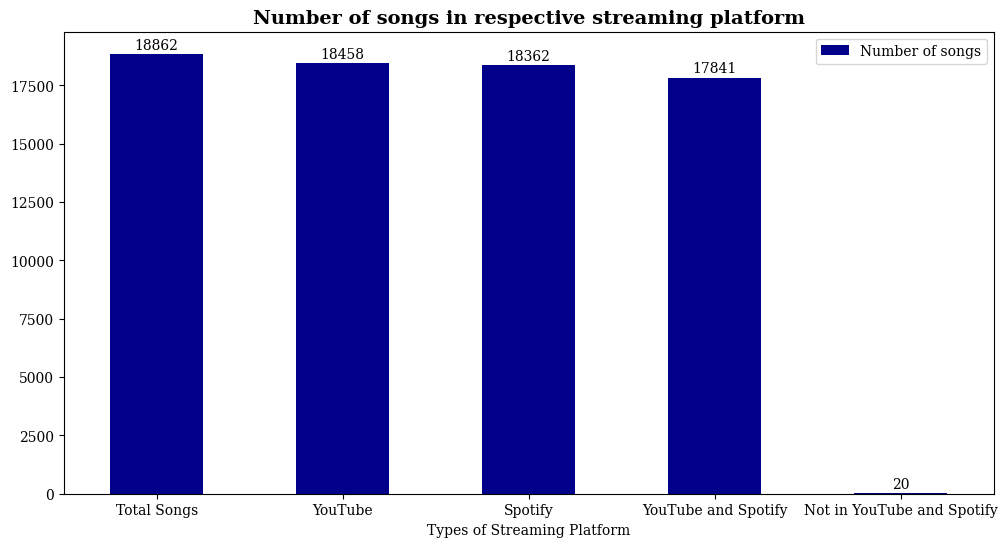

In [ ]:
#Number of songs in respective streaming platform
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
df = pd.DataFrame({'Types of Streaming Platform':['Total Songs', 'YouTube', 'Spotify', 'YouTube and Spotify', 'Not in YouTube and Spotify'], 'Number of songs':[18862, 18458, 18362, 17841, 20]})
ax = df.plot.bar(x='Types of Streaming Platform', y='Number of songs', color=['darkblue'], fontsize=10, rot=0, figsize=(12,6))
ax.set_title("Number of songs in respective streaming platform", fontsize=14,fontweight='bold')
for i, v in enumerate(df['Number of songs']):
    ax.text(i, v+200, str(v), color='black', fontsize=10, ha='center')
plt.show()

In [ ]:
#To check the number of outliers 
interests = ['Danceability','Energy','Key','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness',
             'Valence','Tempo','Duration_ms','Views','Likes','Comments','Stream']

outliers = merged_track_data[interests]

Q1 = outliers.quantile(0.25)
Q3 = outliers.quantile(0.75)
IQR = Q3 - Q1

((outliers < (Q1 - 1.5 * IQR)) | (outliers > (Q3 + 1.5 * IQR))).sum()

Danceability         213
Energy               281
Key                    0
Loudness            1131
Speechiness         2405
Acousticness           0
Instrumentalness    4022
Liveness            1331
Valence                0
Tempo                 57
Duration_ms          692
Views               2378
Likes               2336
Comments            2355
Stream              2011
dtype: int64

Text(0.5, 1.0, 'Outliers - Feature of Songs')

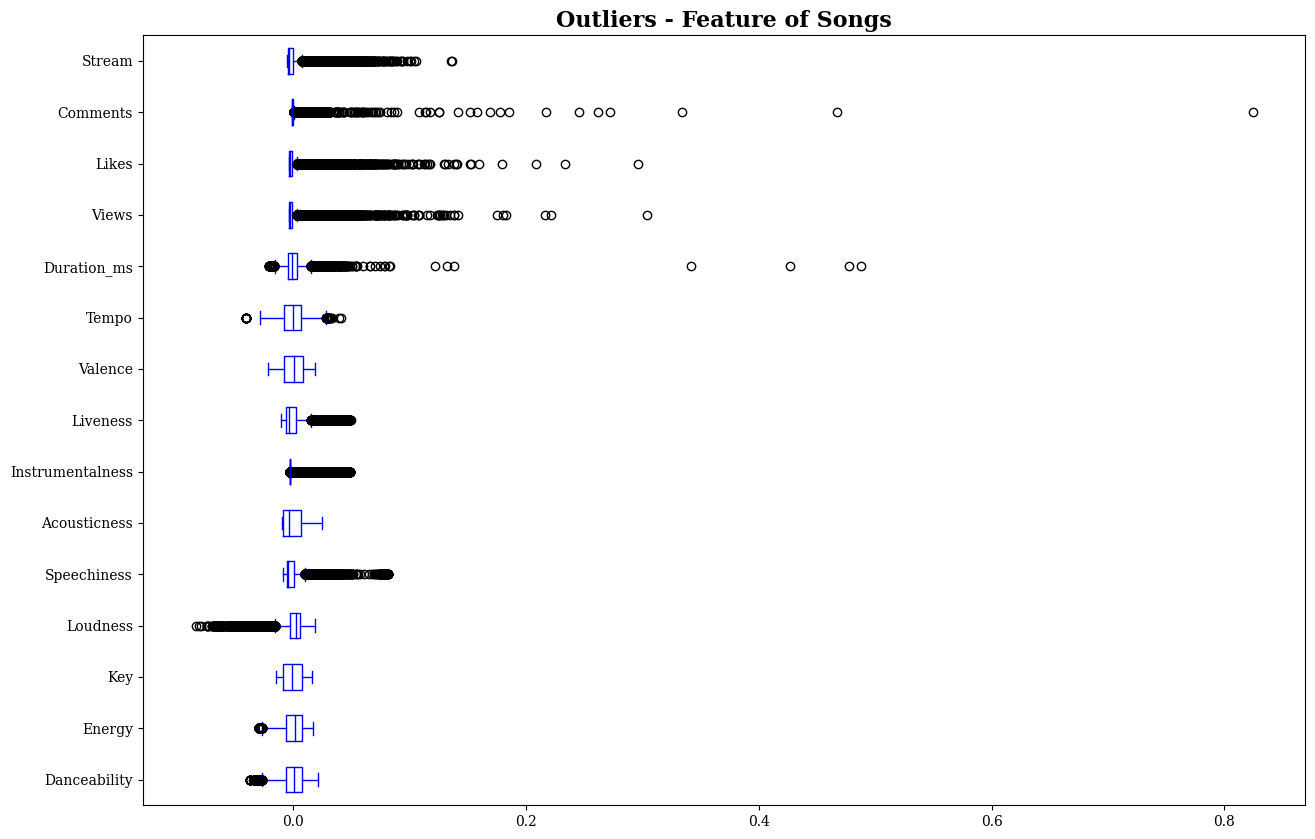

In [ ]:
#Plot Outliers- Comments has the farthest outlier from its mean. 

normalized_cleaned_data=((merged_track_data[interests]-merged_track_data[interests].mean())/merged_track_data[interests].std())/100
normalized_cleaned_data.boxplot(figsize=(15,10), vert=False, showfliers=True, color='blue', grid=False)
plt.title("Outliers - Feature of Songs", fontsize=16, fontweight='bold')

In [ ]:
#New Column Ratio

# Calculate the likes to views ratio
merged_track_data['Likes_to_views_ratio'] = merged_track_data['Likes'] / merged_track_data['Views'] * 100

# Print the top 10 videos with the highest likes to views ratio
top10 = merged_track_data.sort_values('Likes_to_views_ratio', ascending=False).head(10)
print(top10[['Title', 'Likes', 'Views', 'Likes_to_views_ratio']])

                                                   Title      Likes  \
8778                           j-hope 'Intro' Visualizer   237761.0   
15173                    j-hope 'Safety Zone' Visualizer   453910.0   
6555                          j-hope 'Future' Visualizer   250116.0   
13383                  j-hope 'Pandora’s Box' Visualizer   253702.0   
12082  Coldplay X BTS - My Universe (Galantis Remix) ...   371437.0   
2862            Agust D (Feat. MAX) - Burn It (VFX CLIP)   188244.0   
12616                    RM 'No.2 (with 박지윤)' Visualizer   346440.0   
7453                 RM 'Hectic (with Colde)' Visualizer   305506.0   
17263  Stray Kids ＜MAXIDENT＞ UNVEIL : TRACK 3-2 "TAST...   305000.0   
2519                                 Blue Side by j-hope  2357216.0   

            Views  Likes_to_views_ratio  
8778     954081.0             24.920421  
15173   1952637.0             23.246000  
6555    1180522.0             21.186899  
13383   1265231.0             20.051832  
12082   

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50980 (\N{HANGUL SYLLABLE YUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65308 (\N{FULLWIDTH LESS-THAN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65310 (\N{FULLWIDTH GREATER-THAN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/di

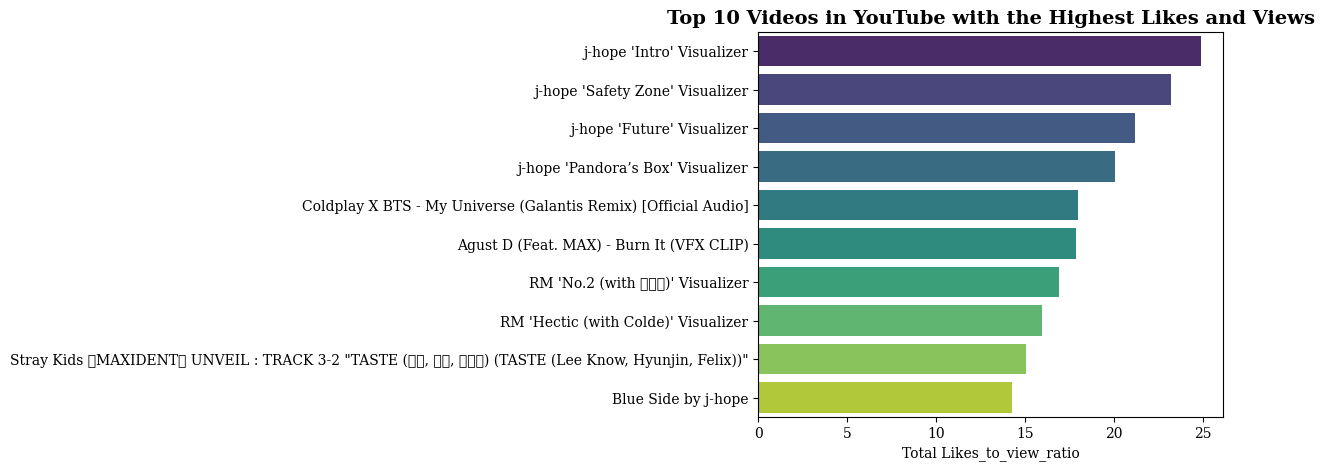

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Top 10 Videos in YouTube with the Highest Likes and Views',fontsize=14, fontweight='bold')
bar_spotify20 = sns.barplot(data= top10, y='Title', x='Likes_to_views_ratio', orient='h', palette='viridis')
plt.xlabel('Total Likes_to_view_ratio')
plt.ylabel('')
plt.show()

In [ ]:
viewtolikes = ['Album','Artist','Likes','Views','Likes_to_views_ratio']
merged_track_data[viewtolikes].describe()

,Likes,Views,Likes_to_views_ratio
count,1.838900e+04,1.845800e+04,18388.000000
mean,6.229439e+05,8.904403e+07,1.218457
std,1.681334e+06,2.607889e+08,1.132458
min,0.000000e+00,0.000000e+00,0.000000
25%,2.068000e+04,1.754198e+06,0.560281
50%,1.169800e+05,1.368734e+07,0.864187
75%,4.846190e+05,6.657492e+07,1.491397
max,5.078863e+07,8.079647e+09,24.920421


In [ ]:
merged_track_data[viewtolikes].head()

,Album,Artist,Likes,Views,Likes_to_views_ratio
0,0:00,Siddhartha,217904.0,20982512.0,1.038503
1,2:00 AM,Arizona Zervas,3838.0,113083.0,3.393967
2,BUBBA,KAYTRANADA,159858.0,11650171.0,1.372152
3,Sauce Boyz,"Brytiago,Eladio Carrion",161737.0,11080437.0,1.459663
5,COSMIC,Bazzi,178545.0,12818856.0,1.392831


In [ ]:
merged_track_data.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,Likes_to_views_ratio
count,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,1.886000e+04,1.845800e+04,1.838900e+04,1.836200e+04,1.831200e+04,18388.000000
mean,0.617587,0.634254,5.304189,-7.708180,0.095390,0.290271,0.056414,0.193052,0.530011,120.800574,2.223716e+05,8.904403e+07,6.229439e+05,2.652553e+04,1.316642e+08,1.218457
std,0.164533,0.215578,3.574140,4.610103,0.112914,0.288201,0.192962,0.167400,0.246651,29.637648,9.065021e+04,2.607889e+08,1.681334e+06,1.922104e+05,2.365431e+08,1.132458
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03,0.000000
25%,0.515000,0.502750,2.000000,-8.952250,0.035300,0.042000,0.000000,0.094100,0.338000,97.005000,1.804800e+05,1.754198e+06,2.068000e+04,4.930000e+02,1.704808e+07,0.560281
50%,0.634000,0.665000,5.000000,-6.587500,0.049800,0.188000,0.000003,0.125000,0.536000,119.976000,2.132910e+05,1.368734e+07,1.169800e+05,3.125500e+03,4.864910e+07,0.864187
75%,0.738000,0.800000,8.000000,-4.960500,0.101000,0.480000,0.000535,0.238000,0.728000,139.979250,2.521398e+05,6.657492e+07,4.846190e+05,1.362050e+04,1.346372e+08,1.491397
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079647e+09,5.078863e+07,1.608314e+07,3.386520e+09,24.920421


In [ ]:
merged_track_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18862 entries, 0 to 20717
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Artist                18862 non-null  object 
 1   Track                 18862 non-null  object 
 2   Album                 18862 non-null  object 
 3   Album_type            18862 non-null  object 
 4   Uri                   18862 non-null  object 
 5   Danceability          18860 non-null  float64
 6   Energy                18860 non-null  float64
 7   Key                   18860 non-null  float64
 8   Loudness              18860 non-null  float64
 9   Speechiness           18860 non-null  float64
 10  Acousticness          18860 non-null  float64
 11  Instrumentalness      18860 non-null  float64
 12  Liveness              18860 non-null  float64
 13  Valence               18860 non-null  float64
 14  Tempo                 18860 non-null  float64
 15  Duration_ms        

In [ ]:
#IMPORTANT NOTE

#"cleaned_data" - 
#It reflects databases consisting of "Artist" based songs.
#Use "cleaned_data" - ONLY when analyzing Artist 

#Export the cleaned data file
#cleaned_data.to_csv("/Users/devi/Documents/Devi/MPS Analytics/Intermediate analytics/Project/cleaned_data.csv")


#"merged_track_data" - 
#The database consits of Unique songs and its features. Same track/album is sung by different artist.
#Use "merged_track_data" - For any kind of analysis on features of songs, Youtube and Spotify except for "Artist" based analysis

#Export the merged track data file
#merged_track_data.to_csv("/Users/devi/Documents/Devi/MPS Analytics/Intermediate analytics/Project/merged_track_data.csv")


In [ ]:
cleaned_1 = merged_track_data.copy() 

In [ ]:
cleaned_1.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,Likes_to_views_ratio
count,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,18860.000000,1.886000e+04,1.845800e+04,1.838900e+04,1.836200e+04,1.831200e+04,18388.000000
mean,0.617587,0.634254,5.304189,-7.708180,0.095390,0.290271,0.056414,0.193052,0.530011,120.800574,2.223716e+05,8.904403e+07,6.229439e+05,2.652553e+04,1.316642e+08,1.218457
std,0.164533,0.215578,3.574140,4.610103,0.112914,0.288201,0.192962,0.167400,0.246651,29.637648,9.065021e+04,2.607889e+08,1.681334e+06,1.922104e+05,2.365431e+08,1.132458
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03,0.000000
25%,0.515000,0.502750,2.000000,-8.952250,0.035300,0.042000,0.000000,0.094100,0.338000,97.005000,1.804800e+05,1.754198e+06,2.068000e+04,4.930000e+02,1.704808e+07,0.560281
50%,0.634000,0.665000,5.000000,-6.587500,0.049800,0.188000,0.000003,0.125000,0.536000,119.976000,2.132910e+05,1.368734e+07,1.169800e+05,3.125500e+03,4.864910e+07,0.864187
75%,0.738000,0.800000,8.000000,-4.960500,0.101000,0.480000,0.000535,0.238000,0.728000,139.979250,2.521398e+05,6.657492e+07,4.846190e+05,1.362050e+04,1.346372e+08,1.491397
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079647e+09,5.078863e+07,1.608314e+07,3.386520e+09,24.920421


In [ ]:
print(cleaned_1.shape)

(18862, 26)


After removing irrelevant column and insignificant outliers, the dataset now consists of 18,862 records with 25 variables

In [ ]:
# define performance variables Streams (spotify) and Likes-Comments-Views (Youtube)
keys = ['Stream','Likes','Views','Comments']

In [ ]:
cleaned_1[keys].head()

,Stream,Likes,Views,Comments
0,54468664.0,217904.0,20982512.0,7600.0
1,5088130.0,3838.0,113083.0,241.0
2,93637411.0,159858.0,11650171.0,2505.0
3,126957216.0,161737.0,11080437.0,1329.0
5,197304986.0,178545.0,12818856.0,4436.0


In [ ]:
# key statistics
cleaned_1[keys].describe()

,Stream,Likes,Views,Comments
count,1.831200e+04,1.838900e+04,1.845800e+04,1.836200e+04
mean,1.316642e+08,6.229439e+05,8.904403e+07,2.652553e+04
std,2.365431e+08,1.681334e+06,2.607889e+08,1.922104e+05
min,6.574000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.704808e+07,2.068000e+04,1.754198e+06,4.930000e+02
50%,4.864910e+07,1.169800e+05,1.368734e+07,3.125500e+03
75%,1.346372e+08,4.846190e+05,6.657492e+07,1.362050e+04
max,3.386520e+09,5.078863e+07,8.079647e+09,1.608314e+07


In [ ]:
artist = cleaned_data.copy()

In [ ]:
# top 10 best viewed artistes on Youtube
list_1 = artist.groupby(artist['Artist'],as_index=False)['Views','Likes','Comments'].sum().sort_values('Views',ascending=False)
list_1.head(10)

<ipython-input-41-b532f90cf3ad>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  list_1 = artist.groupby(artist['Artist'],as_index=False)['Views','Likes','Comments'].sum().sort_values('Views',ascending=False)


,Artist,Views,Likes,Comments
526,Ed Sheeran,1.546021e+10,83543319.0,2520822.0
374,CoComelon,1.460167e+10,41713913.0,0.0
955,Katy Perry,1.312063e+10,63067090.0,3153267.0
333,Charlie Puth,1.216759e+10,86336925.0,3723796.0
1149,Luis Fonsi,1.162811e+10,66908489.0,4703428.0
927,Justin Bieber,1.099106e+10,78584348.0,7259120.0
422,Daddy Yankee,1.087193e+10,65518171.0,4672128.0
267,Bruno Mars,1.024092e+10,59616146.0,1924316.0
1184,Macklemore & Ryan Lewis,1.012206e+10,66041410.0,2425190.0
381,Coldplay,9.997278e+09,63157895.0,2124370.0


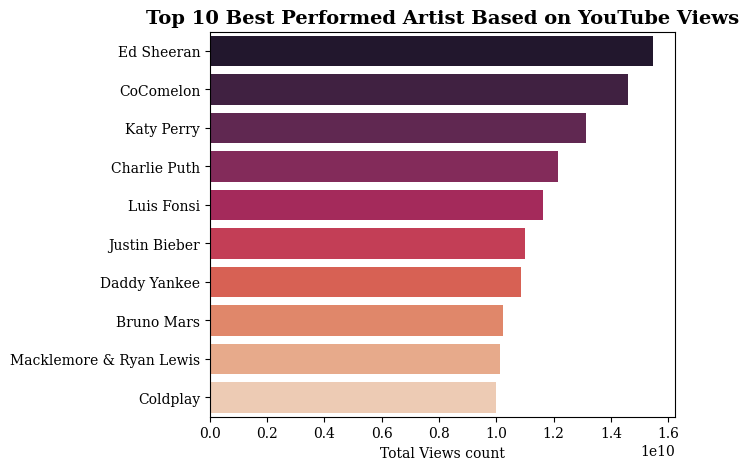

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Top 10 Best Performed Artist Based on YouTube Views',fontsize= 14, fontweight= 'bold')
bar_youtube20 = sns.barplot(data= list_1.head(10), y='Artist', x='Views', orient='h', palette='rocket')
plt.xlabel('Total Views count')
plt.ylabel('')
plt.show()

In [ ]:
# top 10 best streamed artistes on Spotify
list_2 = artist.groupby(['Artist'],as_index=False)['Stream','Views','Likes'].sum().sort_values('Stream',ascending=False)
list_2.head(10)

<ipython-input-43-820901f62b71>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  list_2 = artist.groupby(['Artist'],as_index=False)['Stream','Views','Likes'].sum().sort_values('Stream',ascending=False)


,Artist,Stream,Views,Likes
1497,Post Malone,1.525126e+10,6.394420e+09,53974744.0
526,Ed Sheeran,1.439488e+10,1.546021e+10,83543319.0
507,Dua Lipa,1.340808e+10,8.216339e+09,62627677.0
2000,XXXTENTACION,1.322435e+10,2.546374e+09,44228598.0
1861,The Weeknd,1.303197e+10,7.046033e+09,49056880.0
927,Justin Bieber,1.209777e+10,1.099106e+10,78584348.0
777,Imagine Dragons,1.185831e+10,9.093785e+09,72274477.0
381,Coldplay,1.177848e+10,9.997278e+09,63157895.0
982,Khalid,1.138684e+10,5.398246e+09,46881447.0
267,Bruno Mars,1.089786e+10,1.024092e+10,59616146.0


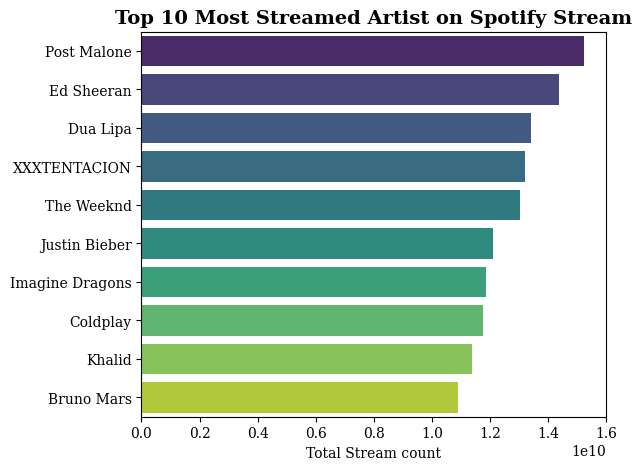

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Top 10 Most Streamed Artist on Spotify Stream',fontsize=14, fontweight='bold')
bar_spotify20 = sns.barplot(data= list_2.head(10), y='Artist', x='Stream', orient='h', palette='viridis')
plt.xlabel('Total Stream count')
plt.ylabel('')
plt.show()

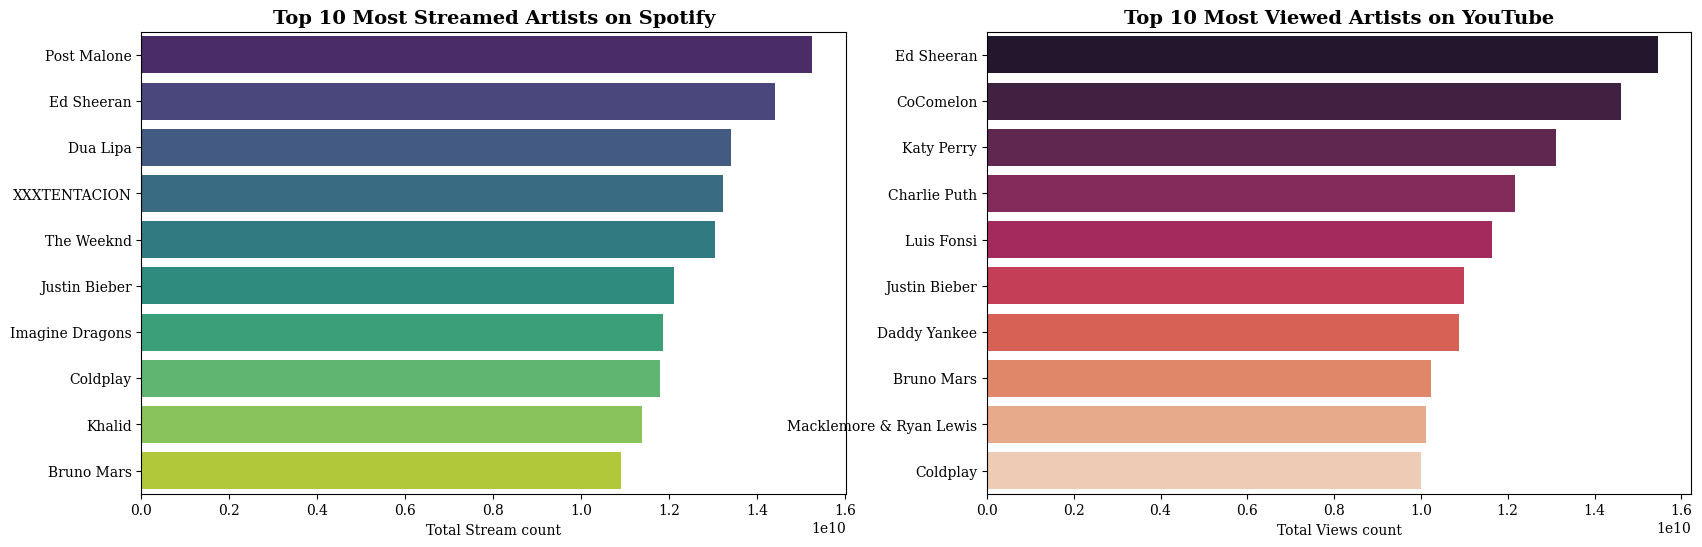

In [ ]:
# this visualization looks better in presentation
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('Top 10 Most Streamed Artists on Spotify',fontsize=14, fontweight='bold')
bar_spotify20 = sns.barplot(data= list_2.head(10), y='Artist', x='Stream', orient='h', palette='viridis')
plt.xlabel('Total Stream count')
plt.ylabel('')


plt.subplot(1, 2, 2)
plt.title('Top 10 Most Viewed Artists on YouTube',fontsize=14, fontweight='bold')
bar_youtube20 = sns.barplot(data= list_1.head(10), y='Artist', x='Views', orient='h', palette='rocket')
plt.xlabel('Total Views count')
plt.ylabel('')
plt.show()
plt.show()

In [ ]:
artist_both = set(list_1['Artist'].head(10)) & set(list_2['Artist'].head(10))
artist_both

{'Bruno Mars', 'Coldplay', 'Ed Sheeran', 'Justin Bieber'}

In [ ]:
# find top tracks
tracks = merged_track_data.copy()

In [ ]:
track_youtube = tracks.groupby(['Track'],as_index=False)['Views','Likes'].sum().sort_values('Views',ascending=False)
track_youtube.head(10)

<ipython-input-63-e0d797cd246e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  track_youtube = tracks.groupby(['Track'],as_index=False)['Views','Likes'].sum().sort_values('Views',ascending=False)


,Track,Views,Likes
3712,Despacito,8.079647e+09,50788626.0
13159,Shape of You,5.908398e+09,31047780.0
12996,See You Again (feat. Charlie Puth),5.773797e+09,40147618.0
16665,Wheels on the Bus,4.898831e+09,14396841.0
16003,Uptown Funk (feat. Bruno Mars),4.821016e+09,20067879.0
5448,Gangnam Style (강남스타일),4.679767e+09,26399133.0
11450,Perfect,4.080233e+09,24814883.0
14050,Sugar,3.947320e+09,16146579.0
12459,Roar,3.725749e+09,15864499.0
3181,Counting Stars,3.721610e+09,16558621.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


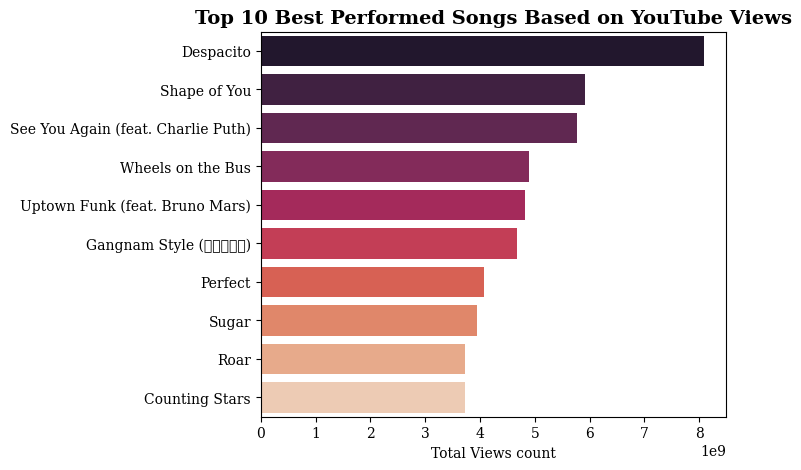

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Top 10 Best Performed Songs Based on YouTube Views',fontsize= 14, fontweight= 'bold')
bar_youtube20 = sns.barplot(data= track_youtube.head(10), y='Track', x='Views', orient='h', palette='rocket')
plt.xlabel('Total Views count')
plt.ylabel('')
plt.show()

In [ ]:
track_spotify = tracks.groupby(['Track'],as_index=False)['Stream'].sum().sort_values('Stream',ascending=False)
track_spotify.head(10)

,Track,Stream
1985,Blinding Lights,3.386520e+09
13159,Shape of You,3.362005e+09
11450,Perfect,3.239169e+09
16910,Without Me,3.124345e+09
2907,Closer,3.009160e+09
5976,Happier,2.959261e+09
13666,Someone You Loved,2.634013e+09
17588,rockstar (feat. 21 Savage),2.594927e+09
14106,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
10942,One Dance,2.522432e+09


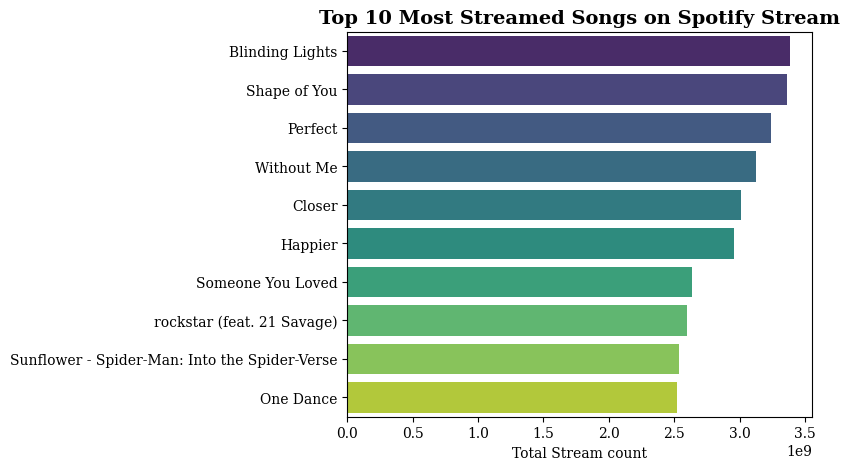

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Top 10 Most Streamed Songs on Spotify Stream',fontsize=14, fontweight='bold')
bar_spotify20 = sns.barplot(data= track_spotify.head(10), y='Track', x='Stream', orient='h', palette='viridis')
plt.xlabel('Total Stream count')
plt.ylabel('')
plt.show()

In [ ]:
tracks_both = set(track_youtube['Track'].head(10)) & set(track_spotify['Track'].head(10))
tracks_both

{'Perfect', 'Shape of You'}

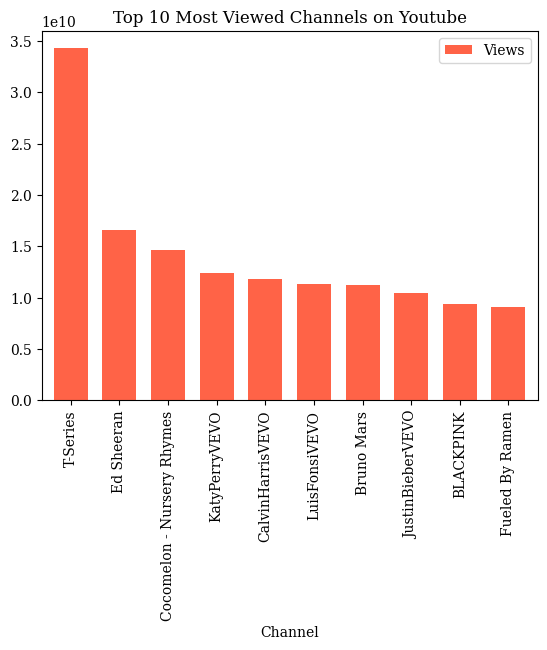

In [ ]:
# Top 10 youtube channel based on Views
channel_top = cleaned_1.groupby(['Channel'],as_index=True)[['Views']].sum().sort_values('Views',ascending=False)
channel_top.head(10).plot(kind="bar", title="Top 10 Most Viewed Channels on Youtube", color='tomato',width = 0.7)
plt.show()

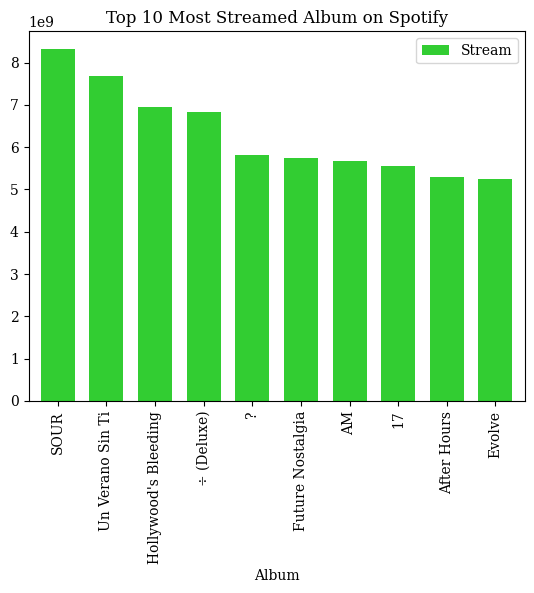

In [ ]:
# Top 10 Spotify album based on Streams
album_top = cleaned_1.groupby(['Album'])[['Stream']].sum().sort_values(['Stream'],ascending=False)
album_top.head(10).plot(kind = 'bar', title = "Top 10 Most Streamed Album on Spotify", width = 0.7, color="limegreen")
plt.show()

In [ ]:
list_2 = artist.groupby(['Artist'])[['Stream','Views','Likes']].sum().sort_values('Stream',ascending=False)
list_2.head(10)

,Stream,Views,Likes
Artist,,,
Post Malone,1.525126e+10,6.394420e+09,53974744.0
Ed Sheeran,1.439488e+10,1.546021e+10,83543319.0
Dua Lipa,1.340808e+10,8.216339e+09,62627677.0
XXXTENTACION,1.322435e+10,2.546374e+09,44228598.0
The Weeknd,1.303197e+10,7.046033e+09,49056880.0
Justin Bieber,1.209777e+10,1.099106e+10,78584348.0
Imagine Dragons,1.185831e+10,9.093785e+09,72274477.0
Coldplay,1.177848e+10,9.997278e+09,63157895.0
Khalid,1.138684e+10,5.398246e+09,46881447.0


In [ ]:
top_channel = merged_track_data.copy()
top_channel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18862 entries, 0 to 20717
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Artist                18862 non-null  object 
 1   Track                 18862 non-null  object 
 2   Album                 18862 non-null  object 
 3   Album_type            18862 non-null  object 
 4   Uri                   18862 non-null  object 
 5   Danceability          18860 non-null  float64
 6   Energy                18860 non-null  float64
 7   Key                   18860 non-null  float64
 8   Loudness              18860 non-null  float64
 9   Speechiness           18860 non-null  float64
 10  Acousticness          18860 non-null  float64
 11  Instrumentalness      18860 non-null  float64
 12  Liveness              18860 non-null  float64
 13  Valence               18860 non-null  float64
 14  Tempo                 18860 non-null  float64
 15  Duration_ms        

In [ ]:
# To understand which channel has highest and lowest number of songs. 
top_songs_channel = top_channel.groupby(['Channel'],as_index=False)[['Title']].count().sort_values(by=['Title'],ascending=False)
top_songs_channel.head(10)

# all from Music Entertaingment companies

,Channel,Title
4807,T-Series,173
4667,SonyMusicIndiaVEVO,66
4668,SonyMusicSouthVEVO,62
4120,RHINO,62
5608,Zee Music Company,48
4418,SMTOWN,47
2027,HYBE LABELS,43
1339,DisneyMusicVEVO,43
426,Atlantic Records,42
4662,Sony Music India,34


In [ ]:
least_songs_channel = cleaned_1.groupby(['Channel'],as_index=False)['Title'].count().sort_values(by=['Title'],ascending=True)
least_songs_channel.head(10)

# all are individual channel for (maybe) hobby 

,Channel,Title
3290,Masanyk3D,1
3994,Pitchfork,1
3992,Pitbull (Classic HipHop & Rap),1
3987,PinkFloyd4K,1
3985,Pink & Grey Subs,1
3983,Pinguini Tattici Nucleari,1
3977,Phoenix Music International Ltd,1
3974,Philharmonia Orchestra - Topic,1
3971,Pheelz,1
3969,Pharrell Williams - Topic,1


In [ ]:
pre_df = cleaned_1.copy()
pre_df.dropna(how='any', inplace=True)

pre_df.isna().sum()

Artist                  0
Track                   0
Album                   0
Album_type              0
Uri                     0
Danceability            0
Energy                  0
Key                     0
Loudness                0
Speechiness             0
Acousticness            0
Instrumentalness        0
Liveness                0
Valence                 0
Tempo                   0
Duration_ms             0
Title                   0
Channel                 0
Views                   0
Likes                   0
Comments                0
Description             0
Licensed                0
official_video          0
Stream                  0
Likes_to_views_ratio    0
dtype: int64

In [ ]:
corr_matrix = pre_df.corr()

corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


<ipython-input-60-cc6a363a5e59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pre_df.corr()
<ipython-input-60-cc6a363a5e59>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,Likes_to_views_ratio
Danceability,1.00,0.22,0.03,0.34,0.23,-0.27,-0.31,-0.08,0.46,-0.07,-0.12,0.08,0.10,0.04,0.06,0.01
Energy,0.22,1.00,0.03,0.74,0.09,-0.66,-0.30,0.17,0.38,0.16,0.02,0.06,0.06,0.04,0.04,-0.07
Key,0.03,0.03,1.00,0.03,0.02,-0.03,0.00,-0.01,0.04,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01
Loudness,0.34,0.74,0.03,1.00,0.07,-0.55,-0.54,0.09,0.31,0.15,0.00,0.12,0.12,0.06,0.11,-0.05
Speechiness,0.23,0.09,0.02,0.07,1.00,-0.10,-0.11,0.07,0.06,0.04,-0.07,-0.01,0.02,0.01,-0.02,0.11
Acousticness,-0.27,-0.66,-0.03,-0.55,-0.10,1.00,0.27,-0.05,-0.20,-0.13,-0.03,-0.07,-0.08,-0.05,-0.10,0.03
Instrumentalness,-0.31,-0.30,0.00,-0.54,-0.11,0.27,1.00,-0.06,-0.26,-0.08,-0.00,-0.08,-0.08,-0.03,-0.09,0.10
Liveness,-0.08,0.17,-0.01,0.09,0.07,-0.05,-0.06,1.00,0.04,0.01,0.01,-0.02,-0.02,-0.01,-0.04,-0.02
Valence,0.46,0.38,0.04,0.31,0.06,-0.20,-0.26,0.04,1.00,0.09,-0.07,0.04,0.01,0.02,-0.02,-0.13
Tempo,-0.07,0.16,-0.00,0.15,0.04,-0.13,-0.08,0.01,0.09,1.00,-0.01,0.00,0.01,0.01,0.01,-0.01


In [ ]:
# let see a model based on song features to predict youtube Views (except predictor below 0.05 linear)

# split train data
X_lm = pre_df[['Energy','Danceability','Loudness','Acousticness','Instrumentalness']]
y_lm = pre_df['Views']

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X_lm,y_lm,test_size=0.3, random_state=0)

regmodel = linear_model.LinearRegression()
lmm = regmodel.fit(X_train_lm,y_train_lm)

print("Coefficients of Energy', Danceability, Loudness, Acousticness and Instrumentalness in LM model is:", regmodel.coef_)

Coefficients of Energy', Danceability, Loudness, Acousticness and Instrumentalness in LM model is: [-87648341.7309769   77246724.03189918   7830417.69069193
 -21419990.24855649 -11347850.54387039]


In [ ]:
y_pred_lm = regmodel.predict(X_test_lm)

In [ ]:
mse = np.mean((y_pred_lm - y_test_lm)**2)

print("Mean squared error of Linea Regression model is:", mse)

Mean squared error of Linea Regression model is: 5.724233396161241e+16


In [ ]:
# compare predicted values with actual test values
regmodel_diff = pd.DataFrame({'Actual value': y_test_lm, 'Predicted value': y_pred_lm,"Difference": y_pred_lm-y_test_lm})
regmodel_diff.head()

,Actual value,Predicted value,Difference
20045,3.549884e+06,7.665764e+07,7.310775e+07
19830,5.061766e+07,8.109255e+07,3.047489e+07
763,1.008938e+09,1.143418e+08,-8.945963e+08
403,8.053025e+06,9.925936e+07,9.120633e+07
19022,2.417391e+07,1.063408e+08,8.216686e+07


In [ ]:
regmodel_diff.describe() #There is a SD of more than 28mio views between Predicted and Actual 

,Actual value,Predicted value,Difference
count,5.230000e+03,5.230000e+03,5.230000e+03
mean,8.720691e+07,9.442103e+07,7.214122e+06
std,2.411659e+08,3.527733e+07,2.391678e+08
min,2.600000e+01,-1.494801e+08,-4.559416e+09
25%,1.992765e+06,8.360379e+07,1.807355e+07
50%,1.400984e+07,1.006863e+08,6.990121e+07
75%,6.708603e+07,1.143868e+08,9.623292e+07
max,4.679767e+09,1.695583e+08,1.610458e+08


In [ ]:
print("R square score of Youtube model:",regmodel.score(X_test_lm, y_test_lm)) # R_square of youtube model

R square score of Youtube model: 0.015606958553864625


In [ ]:
# visualize model preidiction accuracy
pred_actual_sample = regmodel_diff.sample(100)
pred_actual_sample = pred_actual_sample.reset_index()

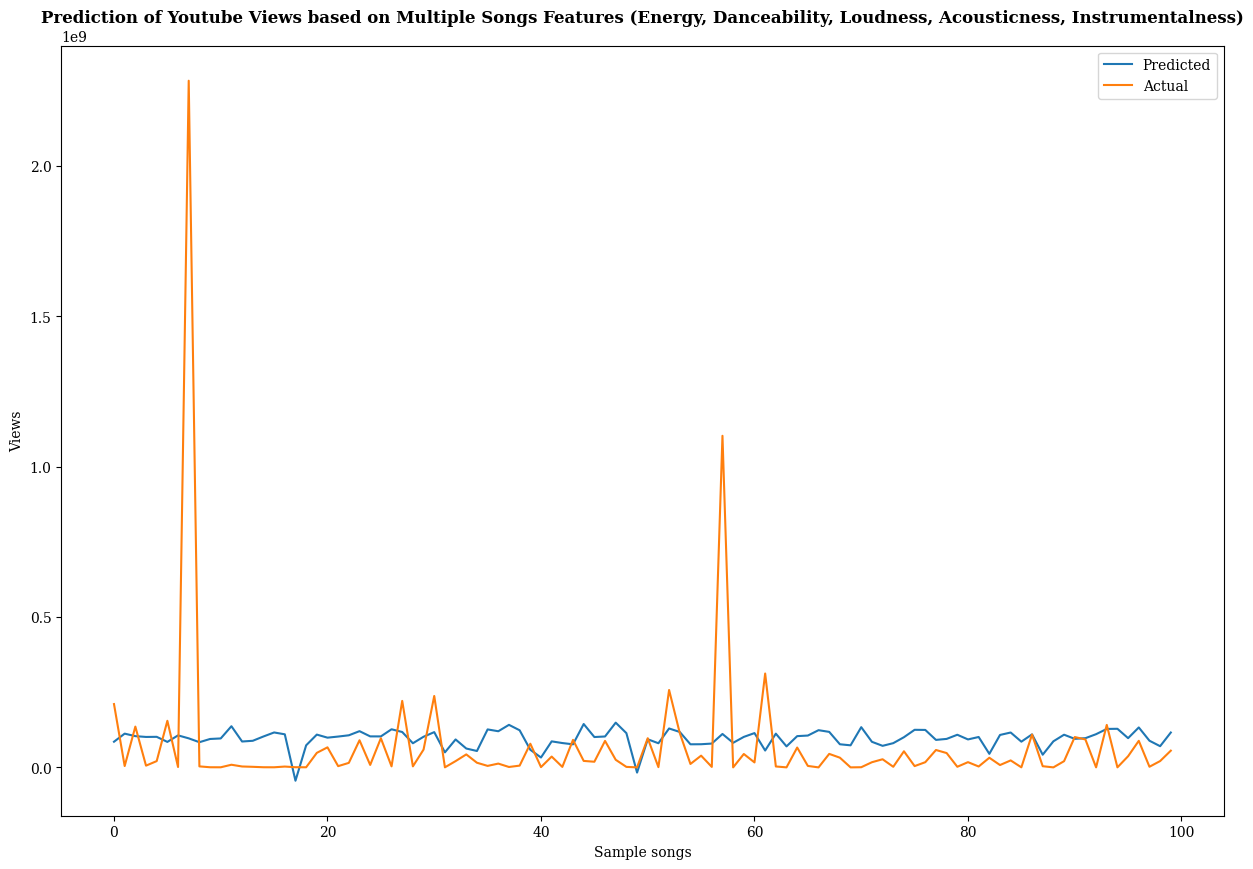

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(pred_actual_sample['Predicted value'],label = 'Predicted') 
plt.plot(pred_actual_sample['Actual value'],label = 'Actual')
plt.xlabel('Sample songs')
plt.ylabel('Views')
plt.title('Prediction of Youtube Views based on Multiple Songs Features (Energy, Danceability, Loudness, Acousticness, Instrumentalness)',fontweight='bold')
plt.legend()
plt.show()

In [ ]:
# let see a model based on song features to predict Spotify Streams (except predictor below 0.05 linear)

# split train data
X_spot = pre_df[['Danceability','Loudness','Acousticness','Instrumentalness']]
y_spot = pre_df['Stream']


X_train_spot, X_test_spot, y_train_spot, y_test_spot = train_test_split(X_spot,y_spot,test_size=0.3, random_state=0)

regmodel_spot = linear_model.LinearRegression()
regmodel_spot.fit(X_train_spot,y_train_spot)

print("Coefficients of Danceability, Loudness, Acousticness and Instrumentalness in LM model is:",regmodel_spot.coef_)


Coefficients of Danceability, Loudness, Acousticness and Instrumentalness in LM model is: [ 28680217.47459451   3345277.32501754 -35867392.2113179
 -50029978.8972108 ]


In [ ]:
y_pred_spot = regmodel_spot.predict(X_test_spot)

In [ ]:
# compare the predicted and actual
regmodel_spot_diff = pd.DataFrame({"Actual" : y_test_spot,"Predicted" : y_pred_spot,"Difference": y_test_spot -y_pred_spot})
regmodel_spot_diff.head()

,Actual,Predicted,Difference
20045,5724420.0,1.184556e+08,-1.127312e+08
19830,341275107.0,1.483654e+08,1.929098e+08
763,587928998.0,1.598979e+08,4.280311e+08
403,23128326.0,1.532823e+08,-1.301539e+08
19022,15955220.0,1.250406e+08,-1.090854e+08


In [ ]:
print("Mean squared error of Linea Regression model is:",mean_squared_error (y_test_spot,y_pred_spot)) #MSE of spot model

Mean squared error of Linea Regression model is: 5.301126957093726e+16


In [ ]:
print("R square score of Spotify model:",regmodel_spot.score(X_test_spot,y_test_spot)) # R_square of spot model

R square score of Spotify model: 0.016747952192356474


In [ ]:
# visualize the model for spotify
pred_sample_spot = regmodel_spot_diff.sample(100)
pred_sample_spot = pred_sample_spot.reset_index()

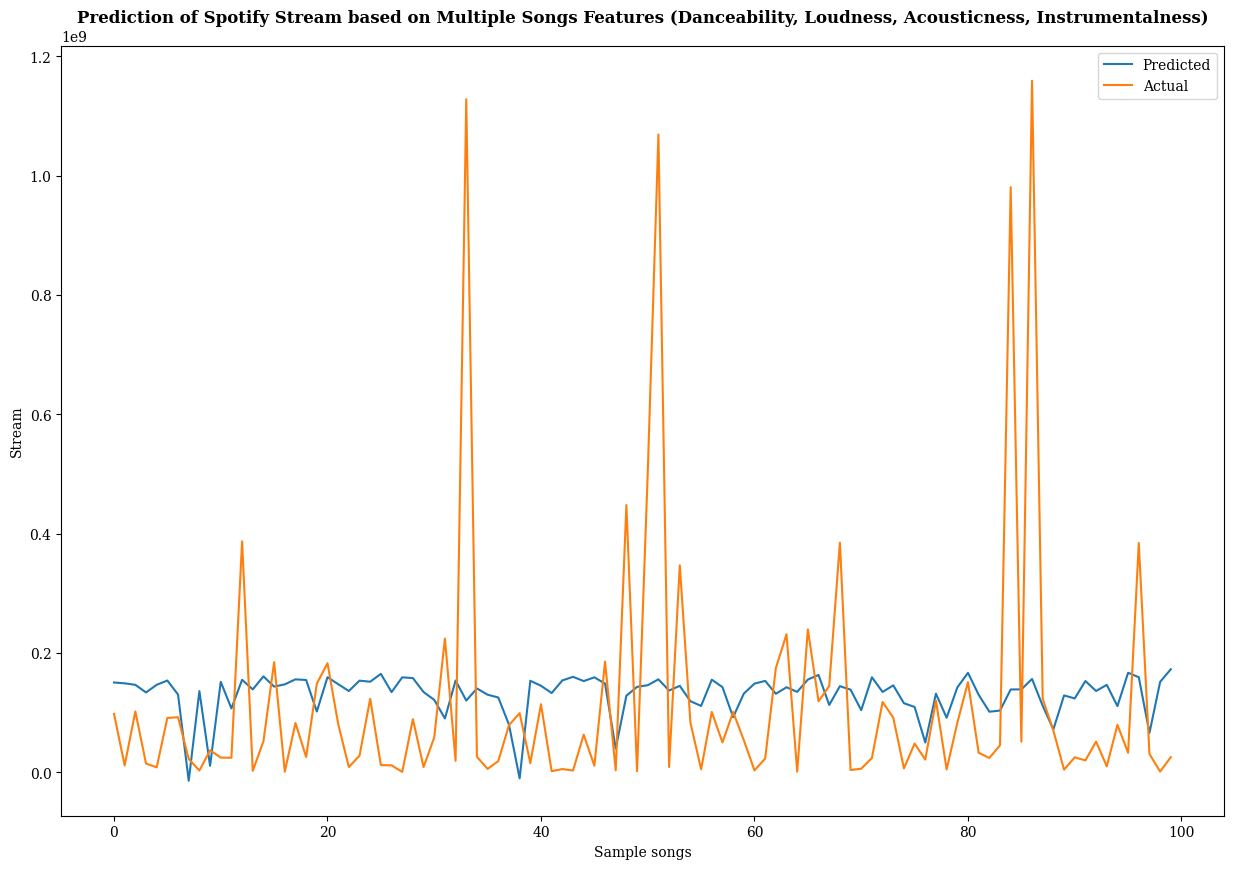

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(pred_sample_spot['Predicted'],label = 'Predicted') 
plt.plot(pred_sample_spot['Actual'],label = 'Actual')
plt.xlabel('Sample songs')
plt.ylabel('Stream')
plt.title('Prediction of Spotify Stream based on Multiple Songs Features (Danceability, Loudness, Acousticness, Instrumentalness)',fontweight='bold')
plt.legend()
plt.show()

**Conclusion**:
Though Youtube model is slightly better fitted (both shown from statistics and visualized), Both models are not preffered due to low prediction ability

In [ ]:
# estimate if platform and artist have interaction effect on songs performance or not 
test_1 = cleaned_1[['Artist','Views','Stream']].copy()
test_1.describe()

,Views,Stream
count,1.845800e+04,1.831200e+04
mean,8.904403e+07,1.316642e+08
std,2.607889e+08,2.365431e+08
min,0.000000e+00,6.574000e+03
25%,1.754198e+06,1.704808e+07
50%,1.368734e+07,4.864910e+07
75%,6.657492e+07,1.346372e+08
max,8.079647e+09,3.386520e+09


In [ ]:
test_2 = test_1[['Artist','Views','Stream']].groupby(['Artist']).sum()
test_2.head()


,Views,Stream
Artist,,
$NOT,1.107849e+08,1.127638e+09
$uicideboy$,3.326213e+08,1.888316e+09
(G)I-DLE,1.035828e+09,8.283989e+08
*NSYNC,1.027833e+09,1.427834e+09
070 Shake,4.491696e+07,1.871358e+08


t-test for difference of 2 means (depedent samples): 
We would like use this dataset as the sample to understand if the each artist receive the same reception on 2 platforms Youtube and Spotify (indicated by Views and Stream). For this question, we can employ the t-test of 2 means

**Hypothestis stating:**
Assuming the Views and Streams of the artists are equal.
- 𝑁𝑢𝑙𝑙 𝐻𝑦𝑝𝑜𝑡ℎ𝑒𝑠𝑒𝑖𝑠 : H0: M1 = M2
- The  𝑎𝑙𝑡𝑒𝑟𝑛𝑎𝑡𝑖𝑣𝑒ℎ𝑦𝑝𝑜𝑡ℎ𝑒𝑠𝑖𝑠  would be that the 2 means are not the same as stated in the null hypothesis: 
H1: M1 >< M2

With alpha=0.05, critical values of 2 tailed test are -1.96 and 1.96


In [ ]:
import scipy.stats as stats
stats.ttest_rel(test_2['Views'], test_2['Stream'])

TtestResult(statistic=-15.363285756565345, pvalue=1.7806596212483008e-51, df=3251)

t-statistic is -15.363285756565345 which is a very large t-statistic. This indicates that YouTube views and Spotify stream of each artist are very different from each other.

Based on the t-statistic, we will reject the Null hypothesis and conclude that there is a significant difference between the reception artists receive on YouTbe and Spotify

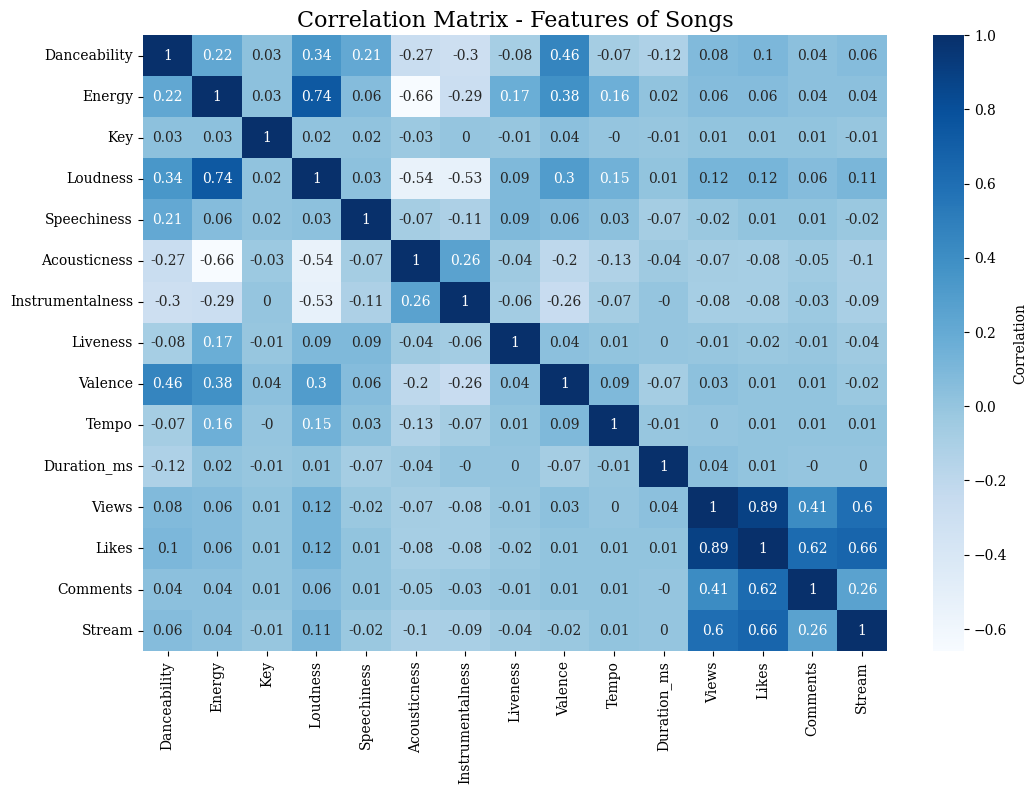

In [ ]:
#Correlation Matrix - Features of Songs

fig, ax = plt.subplots(figsize=(12, 8))
interests_corr = merged_track_data[interests].corr().round(2)
sns.heatmap(data=interests_corr, annot=True, cmap="Blues", cbar_kws={"label": "Correlation"})
ax.set_title("Correlation Matrix - Features of Songs", fontsize=16)
plt.show()

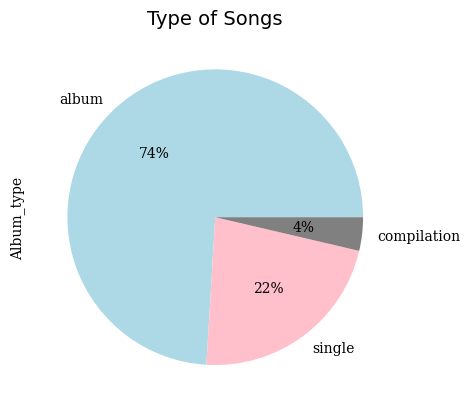

In [ ]:
#Type of Songs
type_album_count = merged_track_data['Album_type'].value_counts()
type_album_count.plot.pie(colors=["lightblue","pink","grey"],autopct='%1.0f%%')
plt.title('Type of Songs',fontdict={'fontname': 'Times New Roman', 'fontsize': 14, 'color': 'black'})
plt.show()

<ipython-input-87-1fc905c19e29>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  type_album_view_stream = merged_track_data.groupby('Album_type').sum().loc[:,['Views','Stream']]


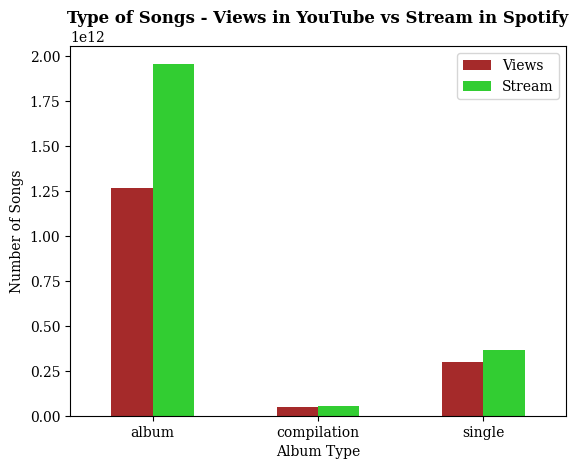

In [ ]:
#Type of Album - Views in YouTube vs Stream in Spotify

type_album_view_stream = merged_track_data.groupby('Album_type').sum().loc[:,['Views','Stream']]
colors = ["brown","limegreen"]
ax = type_album_view_stream.plot(kind="bar", color=colors)
ax.set_xlabel('Album Type')
ax.set_ylabel('Number of Songs')
plt.title('Type of Songs - Views in YouTube vs Stream in Spotify', fontweight="bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # set rotation to 0 degrees
plt.show()

2411035104980.0
1643574634786.0


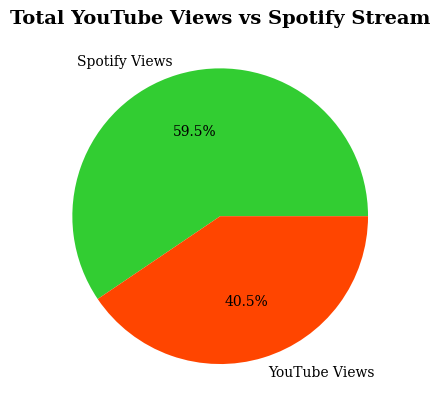

In [ ]:
# total views by STF and YT
utube_views = merged_track_data['Views'].sum()
spot_views = merged_track_data['Stream'].sum()
print(spot_views)
print(utube_views)
values = [spot_views, utube_views]
labels = ['Spotify Views', 'YouTube Views']
plt.title("Total YouTube Views vs Spotify Stream",fontdict={ 'fontsize': 14, 'fontweight': 'bold', 'color': 'black'})
plt.pie(values, labels=labels, autopct='%1.1f%%', colors = ("limegreen","orangeRed"))
plt.show()

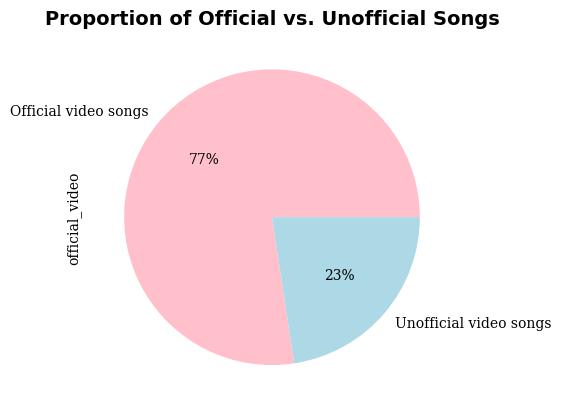

In [ ]:
#official_video or not
official_video_count = merged_track_data['official_video'].value_counts()
official_video_count.index = official_video_count.index.map({True: 'Official video songs', False: 'Unofficial video songs'})
official_video_count.plot.pie(colors=["pink","lightblue"],autopct='%1.0f%%')
plt.title('Proportion of Official vs. Unofficial Songs',fontdict={'fontname': 'Times New Roman', 'fontsize': 14, 'fontweight': 'bold', 'color': 'black'})
plt.show()

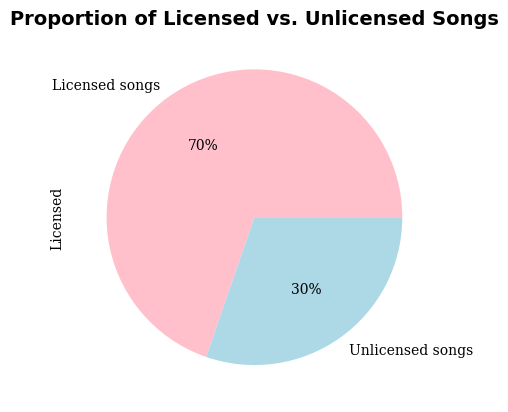

In [ ]:
#Licensed or not
Licensed_count = merged_track_data['Licensed'].value_counts()
Licensed_count.index = Licensed_count.index.map({True: 'Licensed songs', False: 'Unlicensed songs'})
Licensed_count.plot.pie(colors=["pink","lightblue"],autopct='%1.0f%%')
plt.title('Proportion of Licensed vs. Unlicensed Songs',fontdict={'fontname': 'Times New Roman', 'fontsize': 14, 'fontweight': 'bold', 'color': 'black'})
plt.show()

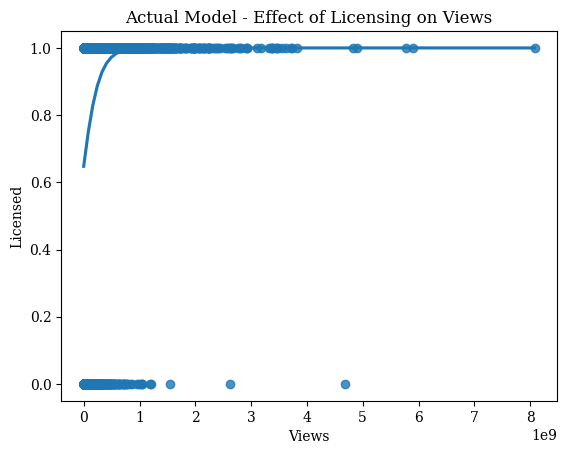

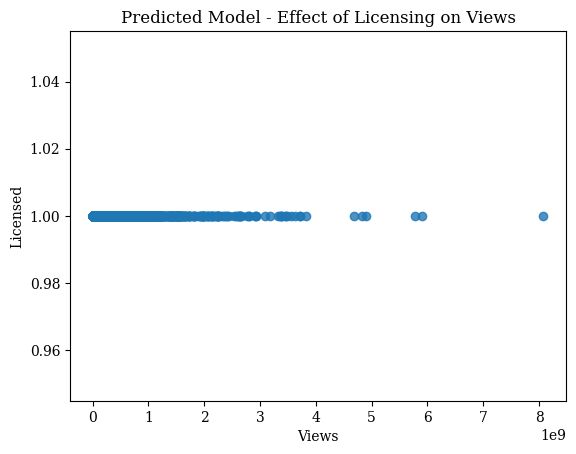

[[    0  4989]
 [    0 12442]]


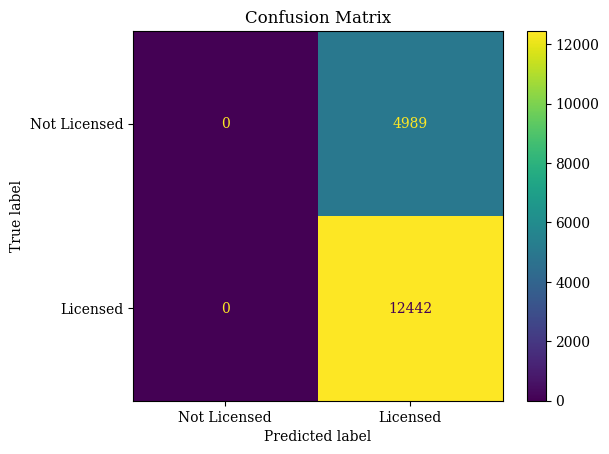

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4989
           1       0.71      1.00      0.83     12442

    accuracy                           0.71     17431
   macro avg       0.36      0.50      0.42     17431
weighted avg       0.51      0.71      0.59     17431



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
##Logistic Regression and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

def convert_to_boolean(x):
  if x[0]:
    return 1
  return 0

# Vy: do we split train data and test data ? if we did, we train the model by train data and test the confusion matrix with test data ?
merged_track_data.dropna(inplace=True)

y_test = merged_track_data[['Licensed']].values
y_test = np.array(list(map(convert_to_boolean, y_test)))
x_test = merged_track_data['Views'].values.reshape(-1,1)
plt.figure(0)
sns.regplot(x=x_test, y=y_test, data=merged_track_data, logistic=True, ci=None)
plt.xlabel('Views')
plt.ylabel('Licensed')
plt.title('Actual Model - Effect of Licensing on Views')
plt.show()


model = LogisticRegression(random_state=42)
model.fit(x_test, y_test)
y_pred = model.predict(x_test)
plt.figure(1)
sns.regplot(x=x_test, y=y_pred, data=merged_track_data, logistic=True, ci=None)
ax.set_ylim([0, 1])
plt.xlabel('Views')
plt.ylabel('Licensed')
plt.title('Predicted Model - Effect of Licensing on Views')
plt.show()


# #Confusion Matrix
y_pred = model.predict(x_test)
score = model.score(x_test, y_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Licensed", "Licensed"])
fig, ax_ = plt.subplots()
disp.plot(ax=ax_)
ax_.set_title("Confusion Matrix")
plt.show()


report = classification_report(y_test, y_pred)
print(report)

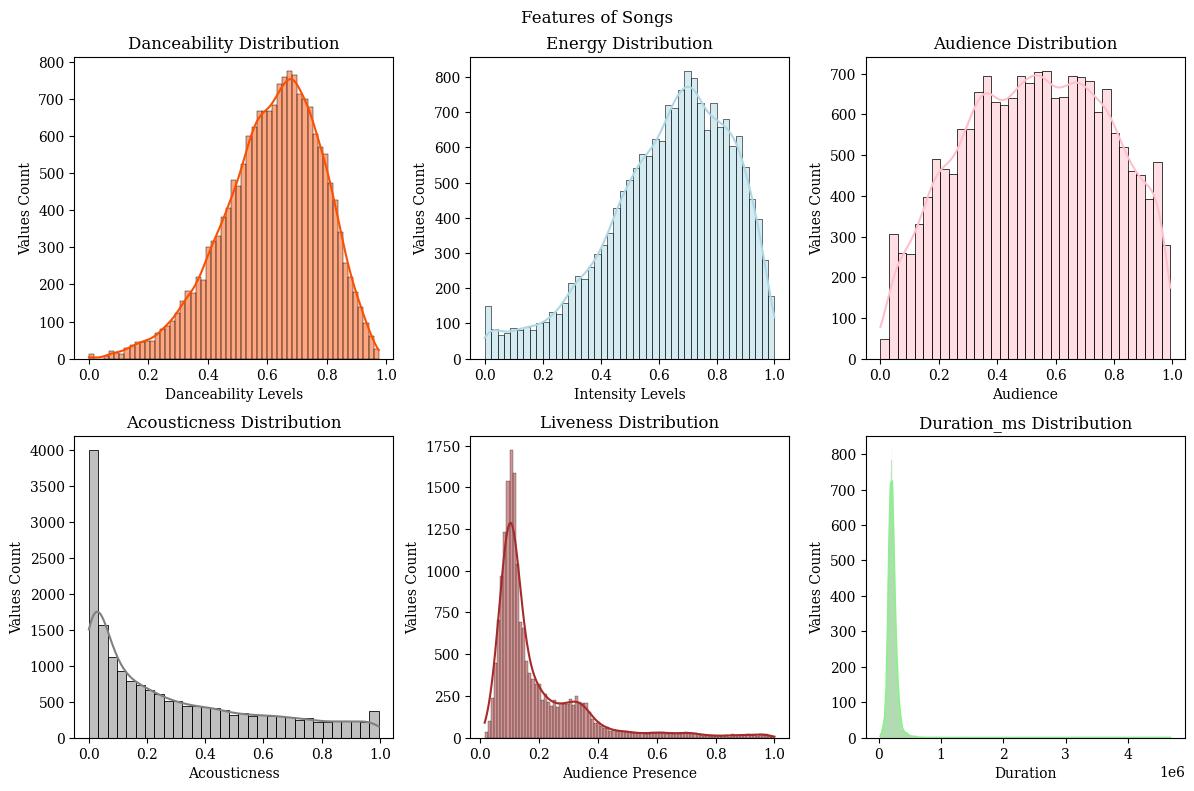

In [ ]:
#Features of songs
fig,axs=plt.subplots(2,3,figsize=(12,8))

sns.histplot(ax=axs[0,0],data=merged_track_data,x="Danceability",kde=True,color="#FC4F00")
axs[0,0].set_title("Danceability Distribution") 
axs[0,0].set_xlabel("Danceability Levels") 
axs[0,0].set_ylabel("Values Count") 
axs[0,0].grid(False)

sns.histplot(ax=axs[0,1],data=merged_track_data,x="Energy",kde=True,color="lightblue") 
axs[0,1].set_title("Energy Distribution") 
axs[0,1].set_xlabel("Intensity Levels") 
axs[0,1].set_ylabel("Values Count") 
axs[0,1].grid(False)

sns.histplot(ax=axs[0][2],data=merged_track_data,x="Valence",kde=True,color="pink") 
axs[0,2].set_title("Audience Distribution") 
axs[0,2].set_xlabel("Audience") 
axs[0,2].set_ylabel("Values Count") 
axs[0,2].grid(False)

sns.histplot(ax=axs[1,0],data=merged_track_data,x="Acousticness",kde=True,color="grey") 
axs[1,0].set_title("Acousticness Distribution") 
axs[1,0].set_xlabel("Acousticness") 
axs[1,0].set_ylabel("Values Count") 
axs[1,0].grid(False)

sns.histplot(ax=axs[1,1],data=merged_track_data,x="Liveness",kde=True,color="brown") 
axs[1,1].set_title("Liveness Distribution") 
axs[1,1].set_xlabel("Audience Presence") 
axs[1,1].set_ylabel("Values Count") 
axs[1,1].grid(False)

sns.histplot(ax=axs[1,2],data=merged_track_data,x="Duration_ms",kde=True,color="lightgreen") 
axs[1,2].set_title("Duration_ms Distribution") 
axs[1,2].set_xlabel("Duration") 
axs[1,2].set_ylabel("Values Count") 
axs[1,2].grid(False)

fig.suptitle("Features of Songs")
plt.tight_layout(pad=.9) 
plt.show()

In [ ]:
merged_track_data['Views_millions'] = merged_track_data['Views'] / 1000000

In [ ]:
correlation = merged_track_data['Stream'].corr(merged_track_data['Views_millions'])

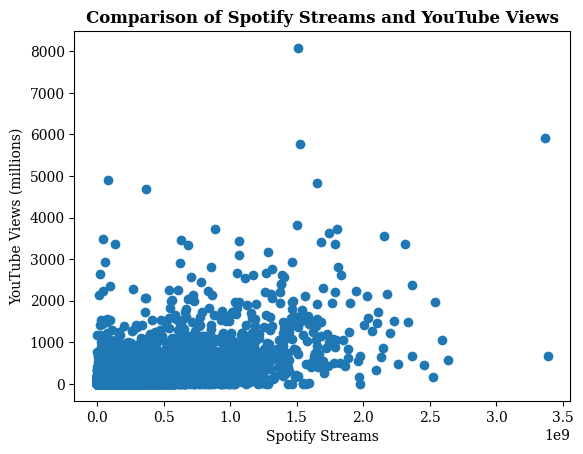

In [ ]:
plt.scatter(merged_track_data['Stream'], merged_track_data['Views_millions'])
plt.xlabel('Spotify Streams')
plt.ylabel('YouTube Views (millions)')
plt.title('Comparison of Spotify Streams and YouTube Views', fontweight="bold")
plt.show()

In [ ]:
# Print the correlation coefficient
print(f"Correlation between Spotify streams and YouTube views: {correlation:.2f}")

Correlation between Spotify streams and YouTube views: 0.60


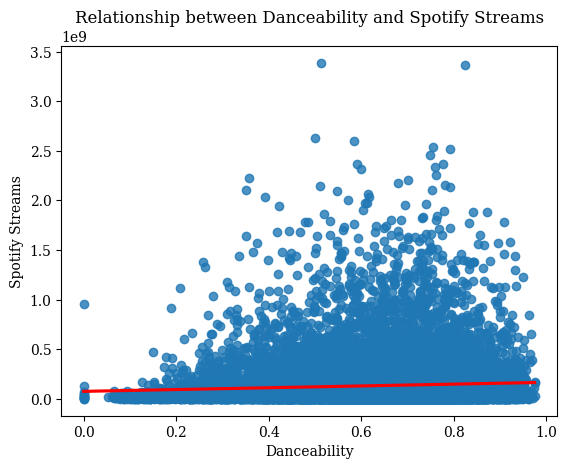

Correlation between Danceability and Spotify Streams: 0.06



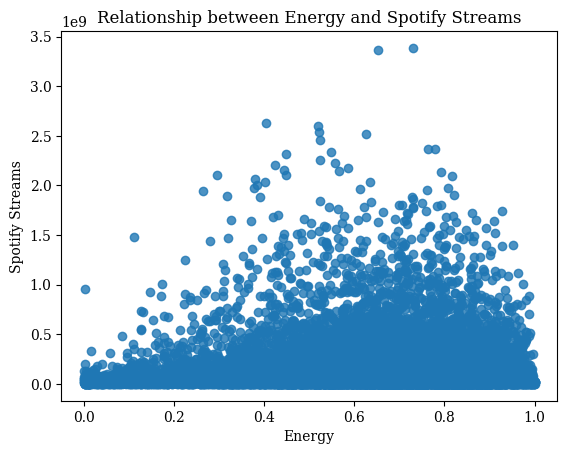

Correlation between Energy and Spotify Streams: 0.04



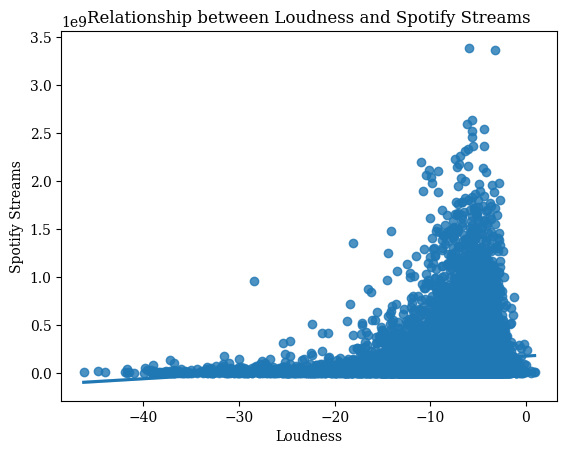

Correlation between Loudness and Spotify Streams: 0.11



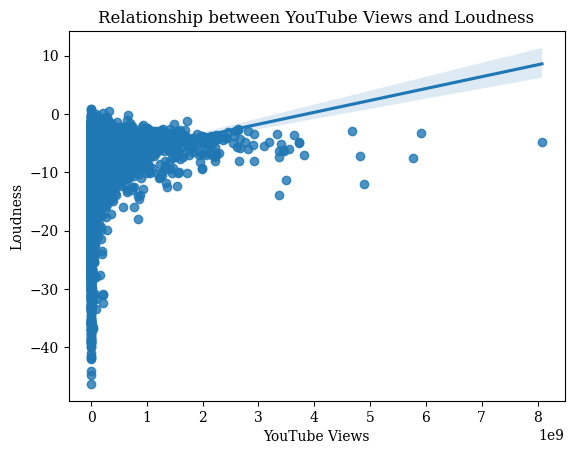

Correlation between YouTube Views and Loudness: 0.12



In [ ]:


# Drop any rows with missing data for either Spotify streams or YouTube views
merged_track_data = merged_track_data.dropna(subset=['Stream', 'Views'])

# Create scatterplots and calculate correlation coefficients for various song characteristics
sns.regplot(x='Danceability', y='Stream', data=merged_track_data,
            line_kws={"color": "red"})
plt.xlabel('Danceability')
plt.ylabel('Spotify Streams')
plt.title('Relationship between Danceability and Spotify Streams')
plt.show()

corr = merged_track_data['Danceability'].corr(merged_track_data['Stream'])
print(f"Correlation between Danceability and Spotify Streams: {corr:.2f}\n")

sns.regplot(x='Energy', y='Stream', data=merged_track_data)
plt.xlabel('Energy')
plt.ylabel('Spotify Streams')
plt.title('Relationship between Energy and Spotify Streams')
plt.show()

corr = merged_track_data['Energy'].corr(merged_track_data['Stream'])
print(f"Correlation between Energy and Spotify Streams: {corr:.2f}\n")

sns.regplot(x='Loudness', y='Stream', data=merged_track_data)
plt.xlabel('Loudness')
plt.ylabel('Spotify Streams')
plt.title('Relationship between Loudness and Spotify Streams')
plt.show()

corr = merged_track_data['Loudness'].corr(merged_track_data['Stream'])
print(f"Correlation between Loudness and Spotify Streams: {corr:.2f}\n")

sns.regplot(x='Views', y='Loudness', data=merged_track_data)
plt.xlabel('YouTube Views')
plt.ylabel('Loudness')
plt.title('Relationship between YouTube Views and Loudness')
plt.show()

corr = merged_track_data['Views'].corr(merged_track_data['Loudness'])
print(f"Correlation between YouTube Views and Loudness: {corr:.2f}\n")


In [ ]:
# Calculate the correlation coefficient between likes and views
correlation_coef = merged_track_data['Likes'].corr(merged_track_data['Views'], method='pearson')

# Print the correlation coefficient
print('Correlation coefficient:', correlation_coef)

Correlation coefficient: 0.8859769863393374


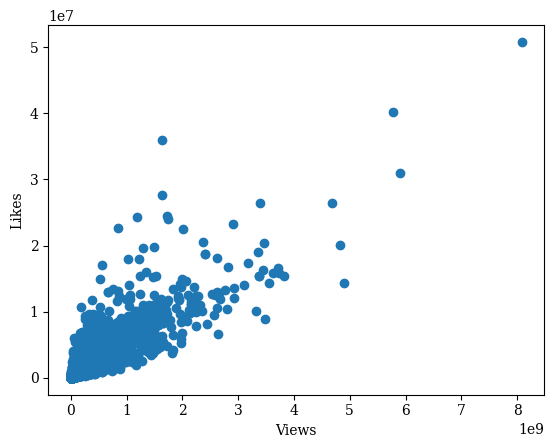

In [ ]:

# Create a scatterplot of likes vs. views
plt.scatter(merged_track_data['Views'], merged_track_data['Likes'])

# Set the x-axis label
plt.xlabel('Views')

# Set the y-axis label
plt.ylabel('Likes')

# Show the plot
plt.show()